In [66]:
import matplotlib.pyplot as plt
from desi_retriever.blanc import get_specs
import pandas as pd
import numpy as np
import scipy.ndimage as sn

In [180]:
dir = "/Users/tlan/Dropbox/Astro_Research/Projects_plots_notes/2020_DESI_visual_inspect/SV1/Truth_tables/"
BGS = pd.read_csv(dir+'desi-vi_BGS_tile80613_nightdeep_merged_all_210202.csv')

In [181]:
tmp_BGS = BGS[(BGS['Redrock_z']>1.2) & (BGS['DELTACHI2']>100) &(BGS['best_spectype']!='QSO') & (BGS['best_spectype']!='STAR')]

# BGS

In [182]:
#print(len(tmp_BGS))
data_dict ={}
BGS_tile = 80613
targetid = np.array(tmp_BGS['TARGETID'])
fiberid = np.array(tmp_BGS['FIBER'])
print('Targetid, fiberid, tileid')
for i in range(0,len(fiberid)):
    data_dict[i]=get_specs(tileid=BGS_tile, night='deep', fiber=fiberid[i], coadd=True)
    print(targetid[i],fiberid[i],BGS_tile)

Targetid, fiberid, tileid
39633331532336363 4216 80613
39633331536529636 4303 80613
39633351635635740 2680 80613
39633328067840127 1085 80613
39633351648216655 3024 80613
39633358170361009 2674 80613
39633331519754738 423 80613
39633331523946719 432 80613
39633331528139161 4855 80613
39633334942305917 4304 80613
39633334946496849 4190 80613
39633334946497323 4187 80613
39633331515556176 1407 80613
39633341682551782 3319 80613
39633324657871646 4701 80613
39633328109783281 4188 80613
39633338306138124 1509 80613
39633338310331015 1512 80613
39633324620124367 967 80613
39633324624315881 989 80613
39633328105588744 4134 80613
39633328097198812 4854 80613
39633328097199882 4565 80613
39633351656607731 3021 80613
39633334925529100 1510 80613
39633341699326713 3695 80613
39633338318718273 3433 80613
39633338327107240 3701 80613
39633341690937412 3703 80613
39633334917140869 1261 80613
39633345000246228 1578 80613
39633345000246379 1551 80613
39633345004442231 1731 80613
39633338331304315 369

In [183]:
for i in range(0,len(fiberid)):
    print(np.array(tmp_BGS['TARGET_RA'])[i],np.array(tmp_BGS['TARGET_DEC'])[i])

107.80000852106869 55.736766492097466
108.13912661528431 55.779380843840634
106.24098570611919 57.29470499092396
104.25799318233787 55.46982206891627
107.42483917523847 57.154813292685226
106.60127041869112 57.652703672485046
106.56089889329344 55.640489215490724
106.80642211699896 55.79203964209205
107.06001061118099 55.771496373146064
108.19422900110548 55.965501800823354
108.29550991514513 55.93668853477227
108.3497074144899 56.0459994777458
105.7286348414641 55.8449073917339
107.2164680049831 56.47458600862643
108.62356146412796 55.20052465033481
108.64522235556817 55.408826291219924
106.0760966321128 56.19825246136938
106.37614727639408 56.18279824971317
104.8080224540237 55.17658910879881
104.99952066295836 55.304890004926484
108.19739922955904 55.59441234539075
107.18349645410869 55.57482978483716
107.28535159948272 55.3829688203797
108.58424097142263 57.16060444389196
106.43783264078004 56.124096901638495
108.78567250228129 56.38904912877146
107.15104303686891 56.34519897761859

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0,len(fiberid)):
    plt.subplot(6,6,i+1)
    plt.plot(data_dict[i][0]['z_wavelength'],sn.median_filter(data_dict[i][0]['z_flux'],51))

# ELGs

In [56]:
ELG = pd.read_csv(dir+'desi-vi_ELG_tile80608_nightdeep_merged_all_210203.csv')

In [164]:
tmp_ELG = ELG[(ELG['Redrock_z']>1.3) & (ELG['DELTACHI2']>50) & (ELG['best_quality']<=2)]

In [165]:
len(tmp_ELG)

61

In [166]:
data_dict_ELG ={}
ELG_tile = 80608
targetid = np.array(tmp_ELG['TARGETID'])
fiberid = np.array(tmp_ELG['FIBER'])
#print('Targetid, fiberid, tileid')
for i in range(0,len(fiberid)):
    data_dict_ELG[i]=get_specs(tileid=ELG_tile, night='deep', fiber=fiberid[i], coadd=True)
    #print(targetid[i],fiberid[i],ELG_tile)

In [167]:
red_calibration_f = np.arange(0,len(fiberid))*0.0
for i in range(0,len(fiberid)):
    search = np.where(data_dict_ELG[i][0]['z_wavelength']>9300)
    red_flux = np.median(data_dict_ELG[i][0]['z_flux'][search[0]])
    search = np.where((data_dict_ELG[i][0]['z_wavelength']<9300) & (data_dict_ELG[i][0]['z_wavelength']>8500))
    blue_flux = np.median(data_dict_ELG[i][0]['z_flux'][search[0]])
    if (red_flux/blue_flux>=2) & (red_flux>0):
        red_calibration_f[i]=1

In [168]:
#ed_calibration_f
len(red_calibration_f)

61

6


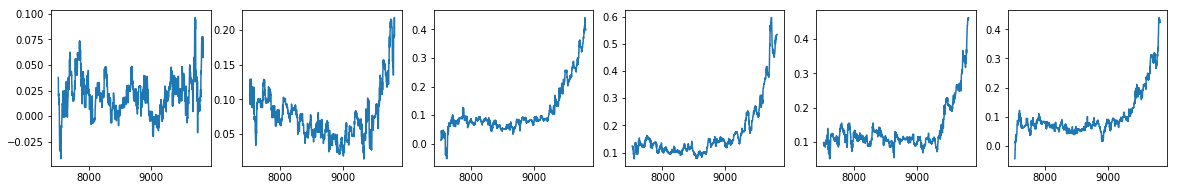

In [169]:
#order_index = np.argsort(-1*red_calibration_f)

search = np.where(red_calibration_f>0.5)
print(len(search[0]))
plt.figure(figsize=(20,20))
for i in range(0,len(search[0])):
    plt.subplot(6,6,i+1)
    plt.plot(data_dict_ELG[search[0][i]][0]['z_wavelength'],
             sn.median_filter(data_dict_ELG[search[0][i]][0]['z_flux'],51)
            )
    #plt.legend()

In [170]:
print('targetid,fiberid,tile')
for i in range(0,len(search[0])):
    print(targetid[search[0][i]],fiberid[search[0][i]],ELG_tile)

targetid,fiberid,tile
39633324649480703 4991 80608
39633334912943844 1149 80608
39633328097200958 4561 80608
39633338301940923 1818 80608
39633328080423088 773 80608
39633354902998497 2445 80608
